<a href="https://colab.research.google.com/github/subuiyer411/nbme/blob/main/NBME_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
features_df = pd.read_csv('features.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')
patient_notes_df = pd.read_csv('patient_notes.csv')

In [ ]:
train_df.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [ ]:
features_df.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [ ]:
patient_notes_df.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [ ]:
sample_submission_df.head()

,id,location
0,00016_000,0 100
1,00016_001,NaN
2,00016_002,200 250;300 400
3,00016_003,NaN
4,00016_004,75 110


In [ ]:
pip install spacy

In [ ]:
pip install scispacy

     |████████████████████████████████| 44 kB 2.0 MB/s 
     |████████████████████████████████| 6.3 MB 17.8 MB/s 
     |████████████████████████████████| 13.5 MB 36.5 MB/s 
     |████████████████████████████████| 71 kB 8.8 MB/s 
     |████████████████████████████████| 188 kB 50.3 MB/s 
     |████████████████████████████████| 451 kB 49.9 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 628 kB 45.8 MB/s 
     |████████████████████████████████| 10.1 MB 18.5 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall

In [ ]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

     |████████████████████████████████| 15.6 MB 1.3 MB/s 
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660350 sha256=cab5017f6e641cdda20028d57e22c7d5926173eb5bbd0003294bd5424c8a7bba
  Stored in directory: /root/.cache/pip/wheels/31/4b/3a/03f2732eb69789a7df3bf29c1bc010f660ada5f3c295d4073c
Successfully built en-core-sci-sm


In [ ]:
import scispacy
import spacy

In [ ]:
nlp_sci = spacy.load("en_core_sci_sm")
nlp_sci

In [ ]:
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 16.8 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp

In [ ]:
text1 = patient_notes_df['pn_history'][0]
print(text1)

17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment
-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav
-associated with dispnea on exersion and rest,stressed out about school
-reports fe feels like his heart is jumping out of his chest
-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam
-pmh:non,meds :aderol (from a friend),nkda
-fh:father had MI recently,mother has thyroid dz
-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school
-sh:no std


In [53]:
doc = nlp(text1)
doc

17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment
-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav
-associated with dispnea on exersion and rest,stressed out about school
-reports fe feels like his heart is jumping out of his chest
-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam
-pmh:non,meds :aderol (from a friend),nkda
-fh:father had MI recently,mother has thyroid dz
-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school
-sh:no std

In [ ]:
for token in doc[:10]:
    print(token.text, token.lemma_, token.pos_, spacy.explain(token.pos_), token.is_stop)

17 17 NUM numeral False
- - PUNCT punctuation False
year year NOUN noun False
- - PUNCT punctuation False
old old ADJ adjective False
male male NOUN noun False
, , PUNCT punctuation False
has have AUX auxiliary True
come come VERB verb False
to to ADP adposition True


In [ ]:
from spacy import displacy
displacy.render(doc[:30], style="dep", jupyter=True)

In [ ]:
for sent in doc.sents:
    print(">", sent)

> 17-year-old male, has come to the student health clinic complaining of heart pounding.
> Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment
-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav
-associated with dispnea on exersion and rest,stressed out about school
-reports fe feels like his heart is jumping out of his chest
-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam
-pmh:non,meds :aderol (from a friend),nkda
-fh:father had MI recently,mother has thyroid dz
-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school
-sh:no std


In [ ]:
for sent in doc.sents:
    print(">", sent.start, sent.end)

> 0 19
> 19 158


Natural Language Understanding

Noun Chunks

In [ ]:
for chunk in doc.noun_chunks:
    print(chunk.text)

17-year-old male
the student health clinic
heart
Mr. Cleveland's mother
verbal consent
a history
physical examination
3-4 min),worsening
dispnea
exersion
rest
his heart
his chest
chest pain
dyaphoresis
wt loss
chills
fever
nausea
vomiting
meds
father
MI
mother
-
smoker
,mariguana 5-6 months ago,3 beers
the weekend
basketball
school
-sh


Named Entities

In [ ]:
for ent in doc.ents:
    print(ent.text, ent.label_)

17-year-old DATE
Cleveland PERSON
2-3 months ago DATE
2 CARDINAL
3-4 min),worsening PERCENT
friend),nkda ORG
MI ORG
5-6 months DATE
the weekend DATE


In [ ]:
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
! pip install https://huggingface.co/kormilitzin/en_core_med7_lg/resolve/main/en_core_med7_lg-any-py3-none-any.whl

     |████████████████████████████████| 790.7 MB 3.5 kB/s 
     |████████████████████████████████| 5.9 MB 23.9 MB/s 
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.7
    Uninstalling spacy-3.0.7:
      Successfully uninstalled spacy-3.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.4.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.1.4 which is incompatible.
en-core-web-sm 3.0.0 requires spacy<3.1.0,>=3.0.0, but you have spacy 3.1.4 which is incompatible.
en-core-sci-sm 0.4.0 requires spacy<3.1.0,>=3.0.1, but you have spacy 3.1.4 which is incompatible.


In [54]:
for tok in doc:
  print(tok.text, "...", tok.dep_)

17 ... nummod
- ... punct
year ... npadvmod
- ... punct
old ... amod
male ... nsubj
, ... punct
has ... aux
come ... ROOT
to ... prep
the ... det
student ... compound
health ... compound
clinic ... nsubj
complaining ... pobj
of ... prep
heart ... pobj
pounding ... advcl
. ... punct
Mr. ... compound
Cleveland ... poss
's ... case
mother ... nsubj
has ... aux
given ... ccomp
verbal ... amod
consent ... dobj
for ... prep
a ... det
history ... pobj
, ... punct
physical ... amod
examination ... conj
, ... punct
and ... cc
treatment ... compound

 ... conj
-began ... punct
2 ... npadvmod
- ... punct
3 ... nummod
months ... npadvmod
ago ... advmod
, ... punct
sudden ... advmod
, ... punct
intermittent ... conj
for ... prep
2 ... pobj
days(lasting ... nmod
3 ... nummod
- ... punct
4 ... prep
min),worsening ... appos
, ... punct
non ... amod
- ... amod
allev ... amod
/ ... punct
aggrav ... amod

 ... pobj
-associated ... punct
with ... prep
dispnea ... pobj
on ... prep
exersion ... pobj
and ...

In [55]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [56]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

In [57]:
patient_notes_df.shape

(16574, 3)

In [60]:
patient_notes_df.sample(10)

,pn_num,case_num,pn_history
8238,33265,3,35 yo male c/o of stomach problems. Patient is...
4245,21282,2,44 yo R presenting with irregular periods for ...
64,66,0,Patient is a 17 M with no sig PMH who presents...
2030,2192,0,CC: heart pounding\r\nHPI: 17 yo M presents fo...
7771,32786,3,Chad Hamilton is a 35 y/o M with PMHx of back ...
14290,39429,3,This is a 35 year old male who presents with a...
10856,35944,3,"a 35-year-old male, has come to the physician'..."
6712,31711,3,Mr. Hamilton is a 35 year old man presenting w...
3585,20557,2,44yoF with HTN presents for irregular periods....
6330,31320,3,Patient is a 35 year old male with PMH of back...


In [85]:
patient_notes_df["pn_history"][0:5]

0    17-year-old male, has come to the student heal...
1    17 yo male with recurrent palpitations for the...
2    Dillon Cleveland is a 17 y.o. male patient wit...
3    a 17 yo m c/o palpitation started 3 mos ago; \...
4    17yo male with no pmh here for evaluation of p...
Name: pn_history, dtype: object

In [94]:
entity_pairs = []

for i in tqdm(patient_notes_df["pn_history"][0:100]):
  entity_pairs.append(get_entities(i))

100%|██████████| 100/100 [00:04<00:00, 21.36it/s]


In [69]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  #matcher.add("matching_1", None, pattern) 
  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [70]:
get_relation("John completed the task")

'completed'

In [95]:
relations = [get_relation(i) for i in tqdm(patient_notes_df['pn_history'][0:100])]

100%|██████████| 100/100 [00:04<00:00, 24.96it/s]


In [96]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [97]:
kg_df.head()

,source,target,edge
0,recently mother,"ago,3 school \r\n -sh",denies
1,One time,better weight roommate,tried
2,FH mother thyroid disease,3 living sitting,drugs
3,THYROID FATHER,ONE MARIJUANA,USE OF
4,intermittently last,prior event,KNDA


In [98]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


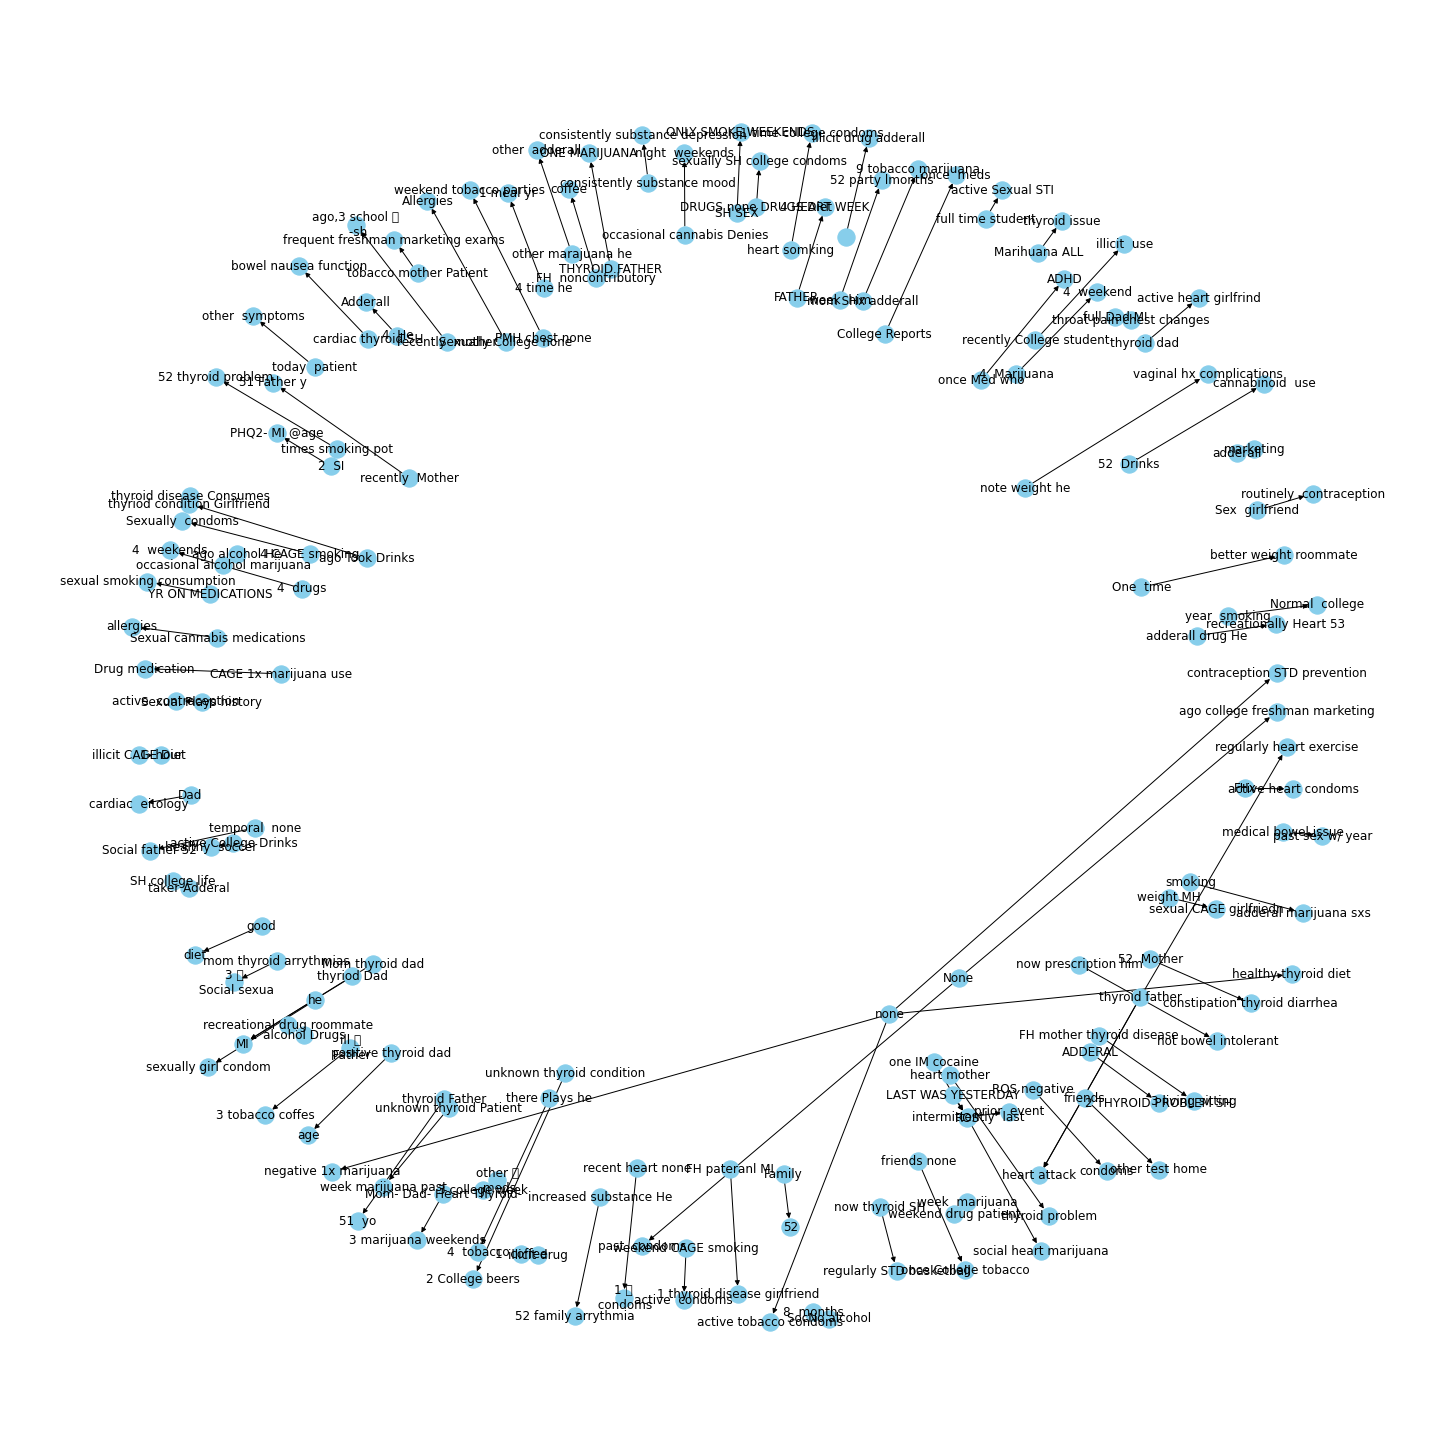

In [99]:
plt.figure(figsize=(20,20))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

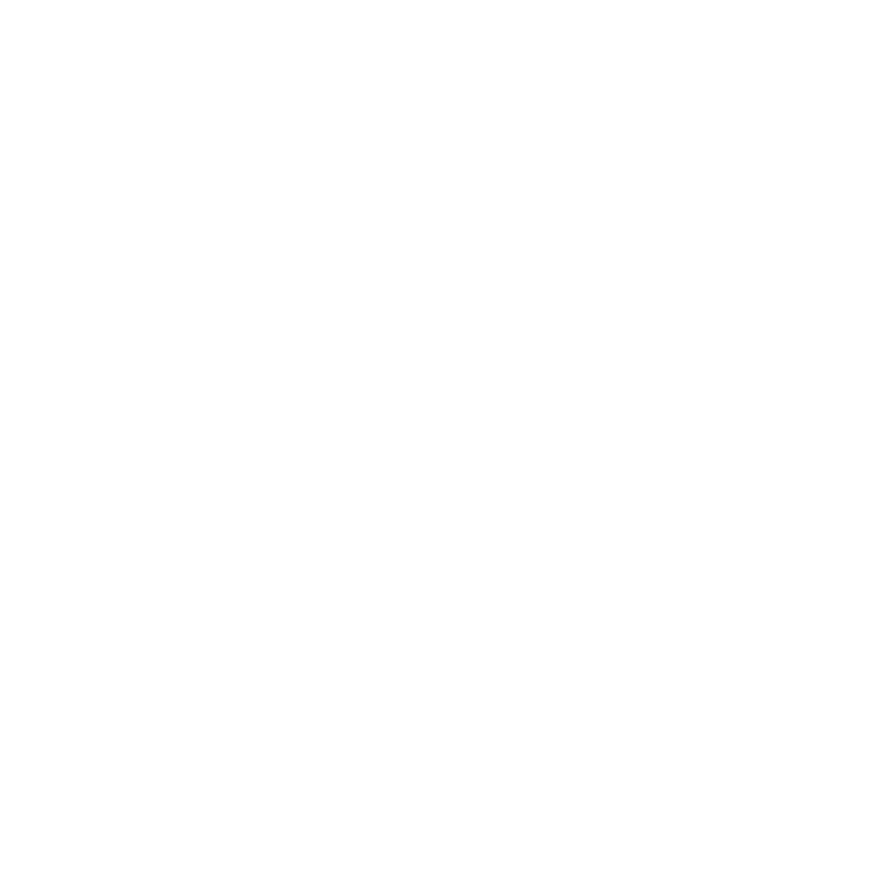

In [93]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="recent"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# New Section